<a id='table_of_content'></a>

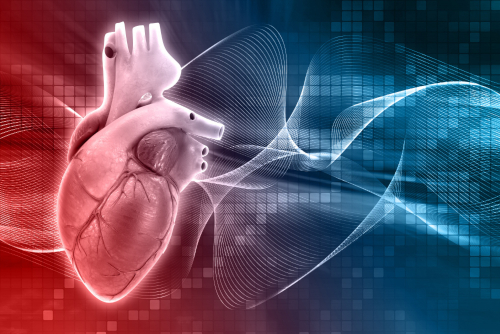

[**Project Properties**](#project_properties)

[**Feature Set Description**](#feature_set_description)

[**Exploratory Data Analysis**](#eda)

[**Outlier elimination among features representing medical observations**](#outliers)

[**Correlation Discovery**](#correlation)

# Survival analysis of heart failure patients, EDA + Prediction


## Problem statement

The problem, this project is going to analyze is <u>**one of the most common and deadly human body failures**</u>: <span style="color:red;font-size:16pt">**The heart attack**</span>.

According to the project citation, the data is related to a <a href="https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0181001">scientific study</a> that was focused on **survival analysis of heart failure patients** who were admitted to Institute of Cardiology and Allied hospital Faisalabad-Pakistan during April-December (2015).

- All the patients were 
  - aged **40 years or above**, 
  - having **left ventricular systolic dysfunction**, belonging to **NYHA class III and IV**. 
  
- **Note**: **New York Heart Association (NYHA) Classification** refers to the **stages of heart failure** as follows:
    - **Class I** - No symptoms and no limitation in ordinary physical activity, e.g. shortness of breath when walking, climbing stairs etc.
    - **Class II** - Mild symptoms (mild shortness of breath and/or angina) and slight limitation during ordinary activity.
    - **Class III** - Marked limitation in activity due to symptoms, even during less-than-ordinary activity, e.g. walking short distances (20—100 m).Comfortable only at rest.
    - **Class IV** - Severe limitations. Experiences symptoms even while at rest. Mostly bedbound patients. 

- Also, the **Cox regression method was used** <u>to model mortality considering age, ejection fraction, serum creatinine, serum sodium, anemia, platelets, creatinine phosphokinase, blood pressure, gender, diabetes and smoking status as potentially contributing for mortality</u>. 

<a href="http://www.sthda.com/english/wiki/cox-proportional-hazards-model">**Cox's proportional hazards regression model**</a> (also called **Cox regression** or Cox's model) builds a **survival function** which tells you **probability a certain event (e.g. death) happens at a particular time t**. 

- <a href="https://en.wikipedia.org/wiki/Kaplan%E2%80%93Meier_estimator">**Kaplan Meier plot**</a> was used to study the general pattern of survival which showed **high intensity of mortality in the initial days and then a gradual increase up to the end of study**. 

- <a href="https://www.jstor.org/stable/2336057">**Martingale residuals**</a> were used to assess functional form of variables. 

- Results were validated using **computing calibration slope** and <u>discrimination ability of model</u> via <a href="https://docs.rapidminer.com/latest/studio/operators/validation/bootstrapping_validation.html">**bootstrapping**</a>.

- For **graphical prediction of survival probability**, a <a href="https://en.wikipedia.org/wiki/Nomogram">**nomogram**</a> was constructed.

As the result of the baseline study, <span style="color:red;font-size:16pt;font-weight:bold"><u>Age</u>, <u>renal dysfunction</u>, <u>blood pressure</u>, <u>ejection fraction</u> and <u>anemia</u> were found as significant risk factors for mortality among heart failure patients</span>.

So, in this project, a bunch of data that is related to the <u>people with cardiovascular disease or who are at high cardiovascular risk</u> (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) is presented and we are going to check if any machine learning model can be helpful for early prediction of thier possible heart attack.

## A piece of domain knowledge

According to the <span style="color:#008dc9;font-size:16pt">**World Health Organization (WHO)**</span> <a href="https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)">report</a>:
- <span style="color:#5C1009;font-size:16pt;font-weight:bold">Cardiovascular diseases (CVDs)</span> are the **leading cause of death globally**. 
- An estimated **17.9 million people died from CVDs in 2019**, representing **32% of all global deaths**. Of these deaths, 85% were due to **heart attack** and **stroke**.
- Over **three quarters of CVD deaths** take place in **low- and middle-income countries**.
- Out of the **17 million premature deaths (under the age of 70)** due to noncommunicable diseases in **2019**, **38% were caused by CVDs**.
- Most cardiovascular diseases <u>can be prevented</u> by addressing **behavioural risk factors** such as:
    - **tobacco use**, 
    - **unhealthy diet** and **obesity**, 
    - **physical inactivity** and **harmful use of alcohol**.

Another report reveals about half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: 
- **high blood pressure**, 
- **high cholesterol**, and 
- **smoking**'.

In addition, while some actions can be taken to decrease the effect of the above-mentioned risk factors, some other risk factors of heart disease such as the **age** or the **family history** cannot be controlled.

In general, the <u>main reasons behind heart failure</u> include but not limited to:
- coronary heart disease, 
- diabetes, 
- high blood pressure and other diseases like HIV, 
- alcohol/cocaine abuse, 
- thyroid disorders, 
- excess of vitamin E in body, 
- radiation or chemotherapy,
- rising stress of economic and social issues in the modern era, 
- poor and oily diet, 
- lack of physical exercises, 
- and, poor health care policies.

The following map (<a href="https://ourworldindata.org/grapher/cardiovascular-disease-death-rates">source</a>) illustrates how **different life styles** and **eating habits** of the people around the world varies the death rate from CVDs in different countries:

In [ ]:
from IPython.display import IFrame
from IPython.core.display import display

display(IFrame('https://ourworldindata.org/grapher/cardiovascular-disease-death-rates', '100%', '600px'))

Therefore, to save more lives, <span style="color:red;font-size:16pt">**it is important to detect cardiovascular disease as early as possible**</span> so that management with counseling and medicines can begin.

---

The final objectives of this project is to use the provided data to perform the following tasks:

1. Performing EDA to obtain useful primary insights. 
2. Using the provided set of input features and their corresponding labels to <span style="color:green;font-size:14pt">**predict the fatal rate of a potential heart attack**</span>. In other words, the problem is to provide a binary classifier that is able to predict if a person is prone to die due to a possible heart attack or not.

<a id='project_properties'></a>

---
<a href="#table_of_content">**up**</a>
# Project Properties


## Some pre-knowledge on data

- Current study is based on **299 patients** of heart failure comprising of **105 women** and **194 men**.

- All the patients were **more than 40 years old**, **having left ventricular systolic dysfunction** and
**falling in NYHA class III and IV**. 

- **Follow up time** was **4–285 days** with **an average of 130 days**.

- **Disease was diagnosed by cardiac echo report** or **notes written by physician**. 

- **Age, serum sodium, serum creatinine, gender, smoking, Blood Pressure (BP), Ejection Fraction (EF), anemia, platelets, Creatinine Phosphokinase (CPK) and diabetes** were considered as **potential variables explaining mortality caused by CHD**. 

- **Age, serum sodium and CPK** are **continuous variables** whereas **EF, serum creatinine and platelets** were taken as **categorical variables**. 

- **EF** was divided into **three levels** (i.e. EF<=30, 30<EF<=45 and EF>45).

- **Platelets** was also divided into **three levels** on the basis of **quartiles**. 

- **Serum creatinine** greater than its normal level (>1.5) is an **indicator of renal dysfunction** that affects mortality rate of the heart failure. 

- **Anemia** in patients was assessed by their **haematocrit level** as **patients with haematocrit less than 36 (minimum normal level of haematocrit)** were taken as **anemic**.

- Up to end of follow-up period, **96 (32%) patients died due to CHD**.

<span style="color:deeppink;font-size:16pt;font-weight:bold">Baseline study findings:</span>

- According to Cox model, **age was most significant variable**. in a way that **Hazard of death due to CHD increases by 4% for every additional year of age**.

- **EF** is **highly significant for mortality**, hazard rate among patients with EF<=30 was 67% and 59% higher as compared to the patients with 30<EF<=45 and EF>45 respectively, while relatively small difference between the survival of patients with 30<EF<=45 and EF>45 can be observed.

- **Death hazard gets more than double for each unit of increase in Serum creatinine**.

- **Serum sodium** was another significant and **its one unit (meq/L) increase, <u>decreases</u> the hazard by 6%**.

- An **anemic patient** had **76% more chances of death** as compared to **non-anemic patient**.

- **Gender, smoking, diabetes, CPK and platelets** were found to be **non-significant**.

- The findings that seem **surprising** are **non-significance of smoking and diabetes**. However, similar results concerning diabetes and smoking have been reported in other studies as well. The reason behind may be **smoking and diabetes are basically causes of heart problem at initial stages**, while baseline study was only concerned with **patients of NYHA class III and IV** which are **advanced stages of heart failure**. So, up to these stages, these factors (diabetes and smoking) may probably be **controlled by medications** and hence **these factors do not have significant effect on deaths due to heart failure in class III and IV**.


<span style="color:deeppink;font-size:16pt;font-weight:bold">Baseline study conclusions:</span>

- It can be concluded that 
    - growing age, 
    - renal dysfunction (having serum creatinine greater than its normal level 1.5), 
    - high BP (higher than normal range), 
    - higher level of anaemia and 
    - lower values of ejection fraction (EF) 
      are the **key factors contributing towards increased risk of mortality among heart failure patients**.
      
- Increased level of **serum sodium** can **reduce the odds of death**. 

- **No significant differences** were found due to **smoking status, diabetes and gender of patients**.

<span style="color:deeppink;font-size:16pt;font-weight:bold">Baseline Model Validation</span>:

- For model validation, **calibration slope** and **ROC curve** are developed from **200 bootstrapped samples**. 

- **Calibration slope** was equal to **0.96**, which showed that **model was not over fitted** and **predictions made by this model** would **neither be overestimated nor under estimated**.

- **Area under the curve (AUC)** was **0.81** at time of **250 days** and **0.77** at time of **50 days** thus it can be interpreted that **the model was able to correctly recognize the event of death for <span style="color:red;font-size:16pt;font-weight:bold">81%</span> and <span style="color:red;font-size:16pt;font-weight:bold">77%</span> patients within 250 and 50 days respectively**.

<a id='feature_set_description'></a>

---
<a href="#table_of_content">**up**</a>
## Feature Set Description:

The data that is provided for this project is a csv file (`heart_failure_clinical_records_dataset.csv`) which contains **12 numerical input feature** and the binary label `DEATH_EVENT` as follows:

-`age`: Age of the patient in years, **`[40, 95]`**     

-`anaemia`: A condition in which there is a deficiency of red cells or of haemoglobin in the blood, resulting in pallor and weariness, **`{0:No, 1:Yes}`**

-`creatinine_phosphokinase`: Level of the *CPK enzyme* in patient's blood in *micrograms per liter* *(mcg/L)*, *CPK enzyme* is a protein that helps to elicit chemical changes in your body, **`[23, 7861]`**

-`diabetes`: If the patient has diabetes, **`{0:No, 1:Yes}`**

-`ejection_fraction`: A measurement of the <u>percentage</u> of blood leaving the heart each time it squeezes), **`[14, 80]`**

-`high_blood_pressure`: If a patient has high blood pressure, **`{0:No, 1:Yes}`**      

-`platelets`: Level of *platelets* in patient's blood in *platelets/mL*, *platelets* are small colourless disc-shaped cell fragments without a nucleus, found in large numbers in blood and involved in clotting, **`[25100, 850000]`**

-`serum_creatinine`: Level of creatinine in patient's blood in *mg/dL*, *creatinine* is a chemical compound left over from energy-producing processes in your muscles. The creatinine level is a measure of how well kidneys are performing their job of filtering waste from the blood, **`[0.5, 9.4]`**

-`serum_sodium`: Level of *sodium* in patient's blood in *mEq/L*, **`[113, 148]`**. 
   - Normal sodium levels in the blood are between 135 and 145 mEQ/L. 
   - The high level of sodium in the blood (>145 mEq/L) is known as **Hypernatremia** that is often caused by dehydration or kidney disease. 
   - Also, the low sodium concentration in the blood (<135 mEq/L) is called **Hyponatremia** that may be caused by diarrhea and vomiting and are most common in older adults. 

-`sex`: Gender of the patient, **`{0:Female, 1:Male}`** 

-`smoking`: If the patient smokes,  **`{0:No, 1:Yes}`**     

-`time`: Follow-up period in days, **`[4, 285]`**.

A period of time in which a person's health situation is monitored. This may also include keeping track of the health of people who participate in a clinical study or clinical trial for a period of time, both during the study and after the study ends. 

-`DEATH_EVENT`: If the patient is dead (due to heart attack), <u>**target feature**</u>,  **`{0:No, 1:Yes}`** 


---

### Some interesting questions that we can try to find their answers during our data analysis process:

- What are the most important risk factors among the input features that increase the fatal rate of a heart attack?
- What is the amount of correlation between the given input features and the mortality rate of heart attacks? 
- Does the sex affect the heart attack occurrences? 
- Does smoking and/or diabetes increase the mortality rate of heart attacks, as claimed?
- Which factor(s) determine(s) if a heart attack leads to death or not?
- which features can be considered as the heart health measures that may reduce the risk of having a heart attack in a patient?  
- Which input features are addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity that may increase the risk of a deadly heart attack?
   
More questions can be proposed during the data analysis process.

<a id='eda'></a>

---
<a href="#table_of_content">**up**</a>
## Data Analysis Process

### 1. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is one of the first steps in the data analytics process. This step can be difined as the application of different data visualization techniques on the data to achieve all or some of the following objectives:

1. Gaining new insights about the data.
2. Identifying important chracteristics of the data.
3. Discovering the hidden relations among the data.
4. Detecting outliers and anomalies of the data.
5. Catching mistakes and anomalies.
6. Testing our primary assumption about the data.

and much more.

Let's start our coding journey. First, we need to **import some necessary libraries**:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


# import graph objects as "go" and import tools
import plotly.graph_objs as go
from plotly import tools
import plotly.express as px
import plotly.offline as py

So, the first step is to read the data from the **csv file** and put it into a pandas **DataFrame**:

In [ ]:
# Reading the data
df = pd.read_csv('../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')

# Adding an auxiliary data label for visualization purposes
df['Label'] = ''

df.loc[df['DEATH_EVENT'] == 0, 'Label'] = 'Survived'
df.loc[df['DEATH_EVENT'] == 1, 'Label'] = 'Dead'

# Observing first 10 samples
df.head(10)

### Handling missed values

Now, we can check if the data has **null** values or not:

In [ ]:
df.isnull().sum()

From the above cells, we can see, the data **has no missed values**. 

It is also abvious that we do not have **<u>object type (non-numric) features</u>**. Therefore, there is no need to perform **data type transformation and imputation techniques** (as part of feature engineering or pre-processing) to transfom non-numeric (categorial) features into numerical values.

Now, let's see want insights can we obtain through basic statistical chracteristics of the feature.
Here, the `.describe()` function can provide a summary of statistics of the DataFrame columns:

In [ ]:
pd.set_option("display.precision", 2) # to decrease the display precision to 2 digits
df.describe()

Different primary insights can be obtained from the above table. For example:

- The `age` range of the patients is **[40, 95]** and the average age is **60.83**.
- The mean average of the `sex` attribute (**0.65**) reveals that most of paitients are **male**.
- Also, the mean average of `smoking` and **target attribute** show only **32%** of patients **have smoking problem** and the **death rate of patients** is also **32%**.

### Checking data redundancies

If you are familiar with the concept of data storage and retrieval, you should know **data redundancy (having duplicated rows among the data)** may lead to data anomalies and corruption and should be avoided when using a pandas DataFrame as well. 

To detect data redundencies in a pandas DataFrame, we can use the `.duplicated()` method. 

Let's see, if we have any **duplicated sample** among the data:

In [ ]:
df.duplicated().any()

As you see, fortunately, **there is no duplicated sample among the data**. So, until now, the data seems pretty clean. :)

### Primary Data Observation 

Now that we have no **missed value** or **redundancy** among the data , and **our features are all numerical**, it's time to **get familiar with data through some data visualization steps**.

<a id='outliers'></a>

---
<a href="#table_of_content">**up**</a>
### Outlier elimination among features representing medical observations

To enhance the quality of our data visualizations during the EDA process, it is recommended to first check if there is any outlier among <u>features that are related to medical measurements</u> and eliminate them.

These feature are:

- `creatinine_phosphokinase`
- `ejection_fraction`
- `platelets`
- `serum_creatinine`
- `serum_sodium`

In [ ]:
medical_measurements = ['creatinine_phosphokinase',
                        'ejection_fraction',
                        'platelets',
                        'serum_creatinine',
                        'serum_sodium']

def plot_outliers(df, feature):
    fig = px.box(
                df,
                x=df[feature],
                points="all",
                color="Label",
                color_discrete_sequence = ['red', 'green'], 
                title=  '\'' + feature + '\'' +
                        ' distribution w.r.t. taget feature values (labels)'
    )

    fig.show()

In [ ]:
for feature in medical_measurements:
    plot_outliers(df, feature)

Based on the aboved diagrams, we may conclude that:

- for `creatinine_phosphokinase` **values over 3000 (<3000)** can be considered as **outliers**, because they are far from upper quartiles of both **Survived** (`DEATH_EVENT = 0`) and **Dead** (`DEATH_EVENT = 1`) populations. So, these values of the `creatinine_phosphokinase` feature have less discriminative power and we can neglect them.

- In `ejection_fraction` values, the situation is the same for **values over 60**. 

- For `platelets` attribute, **values over 500K** can be seen as outliers.

- Among `serum_creatinine` values, samples with a **value more than 4** have the same situation, and

-  In `serum_sodium`, any sample with a **value less than 125** seems to be not so useful.

Note that, <u>due to the very low number of samples that we have in our data</u>, **we do not want to be so greedy to removed outliers**.

So, let's remove those samples form our data and take a look at those digrams again:

In [ ]:
primary_size = len(df)

df = df[(df['creatinine_phosphokinase'] < 3000) &
                   (df['ejection_fraction'] < 60) &
                   (df['platelets'] < 500000) &
                   (df['serum_creatinine'] < 4) &
                   (df['serum_sodium'] > 125)
                  ]

print('Number of removed outliers: {}'.format(primary_size - len(df)))

In [ ]:
for feature in medical_measurements:
    plot_outliers(df, feature)

<a id='correlation'></a>

---
<a href="#table_of_content">**up**</a>

### Correlation Discovery
Now we have a **more discriminative data distribution over those features**.

Based on the results of the baseline study, following featurs are the **key factors contributing towards increased/decreased risk of mortality** among heart failure patients:

- `age`,
- `serum creatinine`,
- `high_blood_pressure`,
- `anaemia`,
- `ejection_fraction`, with **positive influence on the mortality rate** , and
- `serum sodium` with **negative influence on the mortality rate**

Let's take a look at the influence of the `age` on death probability:

In [ ]:
fig = px.box(
            df,
            x=df['Label'],
            y=df['age'],
            points="all",
            color="Label",
            color_discrete_sequence = ['red', 'green'], 
            title='<b>Age influence on death probability</b>,<br>' +
                  'it seems getting old can increase the risk of mortality:',
            notched=True
)

fig.show()

Now, Let's see how `serum creatinine` levels differ between the dead and survived patients:

In [ ]:
fig = px.box(
            df,
            x=df['Label'],
            y=df['serum_creatinine'],
            points="all",
            color="Label",
            color_discrete_sequence = ['red', 'green'], 
            title='<b>Influence of serum creatinine level on death probability</b>,<br>' +
                  'also here, it seems survived patients were tend to have less serum creatinine levels:',
            notched=True
)

fig.show()

Let's take a look at `serum sodium` that is claimed to have negative influence on the mortality rate:

In [ ]:
fig = px.box(
            df,
            x=df['Label'],
            y=df['serum_sodium'],
            points="all",
            color="Label",
            color_discrete_sequence = ['red', 'green'], 
            title='<b>Influence of serum sodium level on death probability</b>',
            notched=True
)

fig.show()

In the baseline study it is claimed that **smoking,diabetes, gender** have no significant influence on the death rate. Let's check the `gender`:

In [ ]:
Labels = ['Female', 'Male']

females = len(df[df['sex'] == 0])
males = len(df[df['sex'] == 1])

f_color = 'deeppink' 
m_color = 'dodgerblue'

Values = [females, males]

fig = px.pie(df,
             values=Values,
             color_discrete_sequence=[m_color, f_color],
             hover_name = Labels,
             names = Labels,
             title= 'Gender balance among patients',
             hole = 0.5
            )

fig.show()

                                          
from plotly.subplots import make_subplots


females_dead = len(df[(df['sex'] == 0) & (df['Label'] == 'Dead')])
females_survived = len(df[(df['sex'] == 0) & (df['Label'] == 'Survived')])

males_dead = len(df[(df['sex'] == 1) & (df['Label'] == 'Dead')])
males_survived = len(df[(df['sex'] == 1) & (df['Label'] == 'Survived')])

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(
    go.Pie(labels=['Dead', 'Survived'], values=[females_dead, females_survived],
           title='<b>Females</b>', hole=0.3), row=1, col=1)
fig.update_traces(textfont_size=20, marker=dict(colors=['red', 'green']))

fig.add_trace(
    go.Pie(labels=['Dead', 'Survived'], values=[males_dead, males_survived],
           title='<b>Males</b>', hole=0.3), row=1, col=2)
fig.update_traces(textfont_size=20, marker=dict(colors=['red', 'green']))

fig.show()

As you can see, although **the data is imbalanced with respect to the gender of the patients**, **the death rate is almost the same for both genders**. So, we may conclude <span style="color:CornflowerBlue;font-size:16pt; font-weight:bold">gender does not have a significant influence on the death rate</span> of patients of the current data set**.

In [ ]:
Labels = ['Non-diabetic', 'Diabetic']

nd = len(df[df['diabetes'] == 0]) # non-diabetics
d = len(df[df['diabetes'] == 1]) # diabetics

nd_color = 'gold'
d_color = 'maroon' 


Values = [nd, d]

fig = px.pie(df,
             values=Values,
             color_discrete_sequence=[nd_color, d_color],
             hover_name = Labels,
             names = Labels,
             title= 'Prevalence of diabetes among patients',
             hole = 0.5
            )

fig.show()

                                          
from plotly.subplots import make_subplots


d_dead = len(df[(df['diabetes'] == 1) & (df['Label'] == 'Dead')])
d_survived = len(df[(df['diabetes'] == 1) & (df['Label'] == 'Survived')])

nd_dead = len(df[(df['diabetes'] == 0) & (df['Label'] == 'Dead')])
nd_survived = len(df[(df['diabetes'] == 0) & (df['Label'] == 'Survived')])

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(
    go.Pie(labels=['Dead', 'Survived'], values=[d_dead, d_survived],
           title='<b>Diabetic</b>', hole=0.3), row=1, col=1)
fig.update_traces(textfont_size=20, marker=dict(colors=['red', 'green']))

fig.add_trace(
    go.Pie(labels=['Dead', 'Survived'], values=[nd_dead, nd_survived],
           title='<b>Non-diabetic</b>', hole=0.3), row=1, col=2)
fig.update_traces(textfont_size=20, marker=dict(colors=['red', 'green']))

fig.show()

Again here, although **the data is imbalanced with respect to Prevalence of diabetes among patients**, **the death rate is almost the same for both group of diabetic and non-diabetic patients**. So, we may conclude also <span style="color:maroon;font-size:16pt; font-weight:bold">diabetes does not have a significant influence on the death rate</span> of patients of the current data set.

## Features correlations

Now, it is time to take a look at the existing correlations between our features.
In the following **corellation diagram**, each correlation between a pairs of two features is illustrated as a colored squared at their crossing place. The value of the correlation varies between **[-1, 1]** where **bigger red square** expresses a **stronger negative correlation** between two features which means when the value of a feature goes down the value of the other feature goes up and vice versa and a **bigger blue square** can be interpreted as a **stronger positive correlation** that indicates if the value of a feature goes down the value of the other feature goes down as well and when the value of a feature goes up the value of the other feature goes up too.

In this diagram, we are interested in two types of correlations:
1. a **strong correlation (positive or negative) between each input feature and the target feature (`DEATH_EVENT`)**. To this aim, we should pay attention to the lowest row or the most right column of the diagram and squares in them (bigger is better).

2. We also need to pay attention to the **strong positive or negative corelations between each pair of the input features**. Here, we hope **<u>not to see a strong correlation</u>** because a strong correlation (having a big square in their crossing place) between two input features indicates a **co-linearity** between those features that in simple words means, those two features will present the same information to the model and so, one of them should be removed from the set of input features. Therefore, having such a sitution between each pair of input features may lead to less number of features that we have to feed to the model which in turns means there is less useful information among the data.

In [ ]:
# Import the two methods from heatmap library
from heatmap import heatmap, corrplot

plt.figure(figsize=(16, 16))
corrplot(df.corr(), size_scale=500);

- Based on the above diagram, as partially discovered before, following input features show **strong positive/negative correlations** with the target value (`DEATH_EVENT`):

    - `age` has a **strong positive correlation** with the death rate (<u>there is a big blue square at the crossing place of this feature and the `DEATH_EVENT`</u>), so the older the patient, the higher the possibility of his/her death.

    - `ejection_fraction` has a **strong negative correlation** with the death rate (<u>there is a big red square at the crossing place of this feature and the `DEATH_EVENT`</u>), so the higher the value of `ejection_fraction`, the lower the possibility of the patient death.

    - `high_blood_pressure` also has a **positive correlation** with the death rate, so the higher the blood pressure, the higher the death possibility.

    - `serum_creatinine`  has a **very strong positive correlation** with the death rate, so the higher the value of `serum_creatinine`, the higher should be the death possibility of the patient.

    - `serum_sodium` has a **negative correlation** with the death rate, so the higher the value of `serum_sodium`, the lower the possibility of the patient death.

    - and finally, `time`  has a **very strong negative correlation** with the death rate, so the longer the patient is under the medical care, the lower the possibility of the his/her death. Sounds reasonable, agreed?


- In addition, a few pairs of input features show some degrees of **co-linearity**:

    - `time` and `age` (negative), meaning the younger the patient, the more likely he/she was under medical care (probably old patients didn't normally survive for a long time to be under a longer period of medical care).
    
    - `time` and `high_blood_pressure` (negative), meaning the more the patient is under medical care, the less blood pressure he/she might have (probably due to a longer term of taking medicine).
    
    - `smoking` and `sex` (positive), meaning male patient are more likely to smoke.
    
    - `serum_sodium` and `ejection_fraction` (positive)
    
    - `serum_creatinine` and `age` (negative)
    
    - `serum_sodium` and `serum_creatinine` (negative)
    
    - `creatinine_phosphokinase` and `anaemia` (negative)
    
    and so on.
